## 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import viz

np.random.seed(22)

In [2]:
mean = 2

driveup = stats.poisson(mean)
driveup

Text(0.5, 1.0, 'Poisson Distribution $')

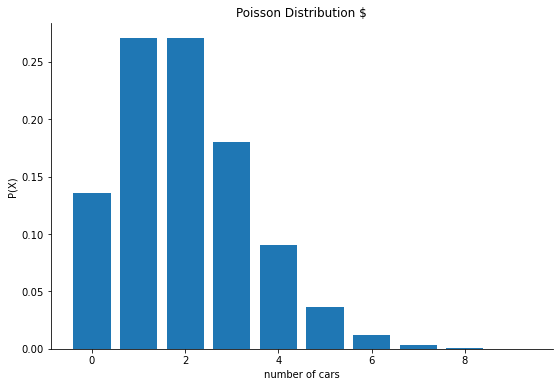

In [3]:
x = np.arange(0,10)
y = stats.poisson(mean).pmf(x)

plt.bar(x,y)
plt.xlabel('number of cars')
plt.ylabel('P(X)')
plt.title('Poisson Distribution $')

### What is the probability that no cars drive up in the noon hour?

In [4]:
stats.poisson(2).pmf(0)

0.1353352832366127

### What is the probability that 3 or more cars come through the drive through?

In [5]:
stats.poisson(2).sf(2)

0.32332358381693654

### How likely is it that the drive through gets at least 1 car?

In [6]:
stats.poisson(2).sf(0)

0.8646647167633873

## 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [7]:
mean = 3
stddev = .3

grades_dist = stats.norm(mean,stddev)
grades_dist


Text(0.5, 1.0, 'Normal Distribution of Grades')

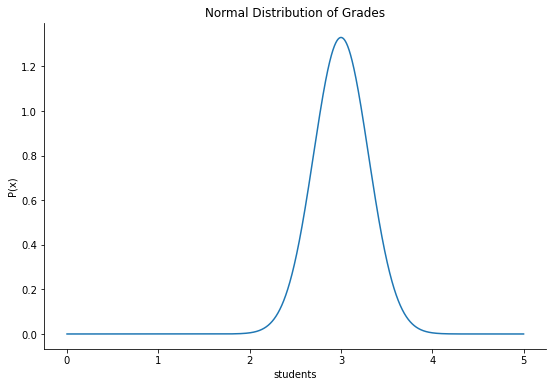

In [8]:
x = np.arange(0,5,.001)
y = grades_dist.pdf(x)

plt.plot(x,y)
plt.xlabel('students')
plt.ylabel('P(x)')
plt.title('Normal Distribution of Grades')

### What grade point average is required to be in the top 5% of the graduating class?

In [9]:
grades_dist.isf(.04)

3.5252058213756507

### What GPA constitutes the bottom 15% of the class?

In [10]:
grades_dist.ppf(.15)

2.689069983151863

### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [11]:
third_decile = (grades_dist.ppf(.4)) - (grades_dist.cdf(.3))
third_decile
# 2.8 would not qualify

2.9239958690592602

### If I have a GPA of 3.5, what percentile am I in?

In [12]:
grades_dist.cdf(3.5)
# 95th percentile

0.9522096477271853

## 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [13]:
avg_rate = .02
n_visitors = 4326
n_avg_clicks = avg_rate * n_visitors
n_avg_clicks


86.52

In [14]:
n_clicks = 97

stats.binom(n_visitors, avg_rate).sf(n_clicks)

0.11781530585907925

## 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
### What is the probability that at least one of your first 60 answers is correct?

In [15]:
stats.binom(60,.01).sf(0)

0.4528433576092388

## 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area.   

In [51]:
p_cleaning = .03
students = 66
r_visits = .9
n_days = 1
students_visit = round(students * r_visits * n_days)
# the probability distribution that a student will clean that day ( 0 students to 8 students)
cleaning = stats.binom(students_visit, p_cleaning)
cleaning

### How likely is it that the break area gets cleaned up each day?

In [49]:
#excludes no students cleaning
cleaning.sf(0)

0.8342199288437355

Text(0.5, 0, 'Number of time area is cleaned per day')

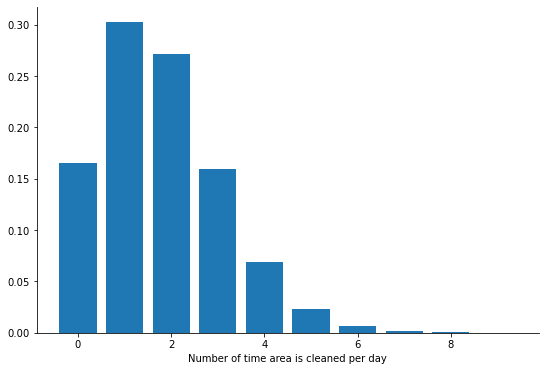

In [50]:
x = np.arange(0, 10)
y = stats.binom(students_visit,p_cleaning).pmf(x)

plt.bar(x, y)
plt.xlabel('Number of time area is cleaned per day')

### How likely is it that it goes two days without getting cleaned up?

In [52]:
# changes days to two, selects zero students cleaning 
n_days = 2
students_visit = round(students * r_visits * n_days)
cleaning = stats.binom(students_visit, p_cleaning)
cleaning.pmf(0)

0.026658541032798945

### [Not Cleaned] All week?

In [53]:
# changes days to five, selects zero students cleaning
n_days = 5
students_visit = round(students * r_visits * n_days)
cleaning = stats.binom(students_visit, p_cleaning)
cleaning.pmf(0)

0.00011781621791055166

## 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [20]:
get_food_mins = 2
order_food_mins = 10
eat_food_mins = 15
lunch_break = 60


μ = (15 * get_food_mins) + order_food_mins + eat_food_mins
σ = (3 * get_food_mins) + order_food_mins + eat_food_mins

lunch = stats.norm(μ, σ)

In [21]:
lunch.cdf(60)

0.5640676275336393

## 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [24]:
def get_db_url(db_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [25]:
url = get_db_url('employees')

In [26]:
sql = '''
SELECT * FROM salaries s
WHERE s.to_date > NOW()
'''


In [31]:
salaries = pd.read_sql(sql,url)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [32]:
# find mean and std dev to create normal distribution
mean = salaries.salary.mean()
std_dev = salaries.salary.std()

### What percent of employees earn less than 60,000?

In [33]:
stats.norm(mean, std_dev).cdf(60_000)

0.24385742480214423

### What percent of employees earn more than 95,000?

In [34]:
stats.norm(mean, std_dev).sf(95_000)

0.09208819199804053

### What percent of employees earn between 65,000 and 80,000?

In [35]:
np.diff(stats.norm(mean, std_dev).cdf([65_000, 80_000]))

array([0.33506057])

In [37]:
np.diff(stats.norm(mean, std_dev).sf([80_000,65_000]))

array([0.33506057])

In [39]:
(stats.norm(mean, std_dev).cdf(80_000)) - (stats.norm(mean, std_dev).cdf(65_000))

0.3350605685446666

### What do the top 5% of employees make?

In [42]:
stats.norm(mean, std_dev).isf(.05)

100484.64454102777

In [43]:
# another way
salaries.salary.quantile(0.95)

104225.84999999998

<AxesSubplot:>

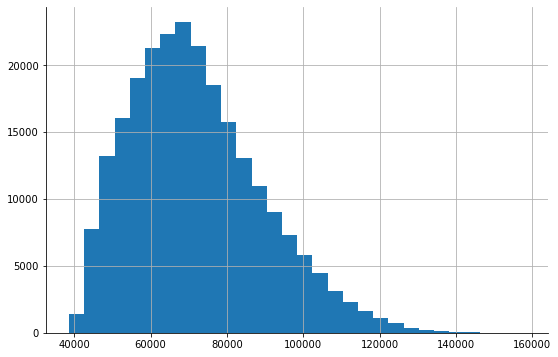

In [44]:
# Are the salaries really distributed normally?

salaries.salary.hist(bins = 30)

### Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql.

### Be sure to run the following 2 commands from your terminal: 
1. cp ~/codeup-data-science/numpy-pandas-visualization-exercises/.gitignore ~/codeup-data-science/statistics-exercises to ensure that your stats repo has a known-good gitignore 
2. cp ~/codeup-data-science/numpy-pandas-exercises/env.py ~/codeup-data-science/statistics-exercises to ensure that pandas will have access to your db credentials.